DEEP LEARNING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load the dataset (replace with your dataset path)
df=pd.read_csv("/content/drive/MyDrive/balanced_malicious_phish.csv")



In [ ]:
#with fine tuning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Example dataset with URL text and labels
# Assuming 'df' is already defined with 'url' and 'type' columns

# Tokenizing the URLs
tokenizer = Tokenizer(char_level=True)  # Treat URLs as character-level sequences
tokenizer.fit_on_texts(df['url'])

# Convert URLs into sequences of integers
X = tokenizer.texts_to_sequences(df['url'])
max_len = 100  # Maximum length of a URL sequence
X = pad_sequences(X, maxlen=max_len)

# Label encoding
le = LabelEncoder()
y = le.fit_transform(df['type'])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the deep learning model with LSTM
model = Sequential()

# Embedding layer to learn representations of characters in URLs
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_len))

# Bidirectional LSTM layer to capture sequential patterns in the URLs
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(GlobalMaxPooling1D())  # Aggregate the most important features

# Dense layers for classification
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer for multi-class classification (4 classes)
model.add(Dense(4, activation='softmax'))

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluate the model
score = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {score[1] * 100:.2f}%")

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


125/125 ━━━━━━━━━━━━━━━━━━━━ 52s 384ms/step - accuracy: 0.4370 - loss: 1.2501 - val_accuracy: 0.7520 - val_loss: 0.6607
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 82s 382ms/step - accuracy: 0.7045 - loss: 0.7365 - val_accuracy: 0.7430 - val_loss: 0.6297
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 83s 386ms/step - accuracy: 0.7286 - loss: 0.6625 - val_accuracy: 0.7780 - val_loss: 0.5212
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 81s 381ms/step - accuracy: 0.7633 - loss: 0.5924 - val_accuracy: 0.7945 - val_loss: 0.5022
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 82s 378ms/step - accuracy: 0.7756 - loss: 0.5609 - val_accuracy: 0.8240 - val_loss: 0.4660
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 85s 403ms/step - accuracy: 0.7971 - loss: 0.5343 - val_accuracy: 0.8335 - val_loss: 0.4468
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 79s 380ms/step - accuracy: 0.8322 - loss: 0.4760 - val_accuracy: 0.8485 - val_loss: 0.4180
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 82s 380ms/step - accuracy: 0.8328 - loss: 0.4879 - val

In [ ]:
#with fine tuning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Example dataset with URL text and labels
# Assuming 'df' is already defined with 'url' and 'type' columns

# Tokenizing the URLs
tokenizer = Tokenizer(char_level=True)  # Treat URLs as character-level sequences
tokenizer.fit_on_texts(df['url'])

# Convert URLs into sequences of integers
X = tokenizer.texts_to_sequences(df['url'])
max_len = 100  # Maximum length of a URL sequence
X = pad_sequences(X, maxlen=max_len)

# Label encoding
le = LabelEncoder()
y = le.fit_transform(df['type'])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the deep learning model with LSTM
model = Sequential()

# Embedding layer to learn representations of characters in URLs
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_len))

# Bidirectional LSTM layer to capture sequential patterns in the URLs
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(GlobalMaxPooling1D())  # Aggregate the most important features

# Dense layers for classification
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer for multi-class classification (4 classes)
model.add(Dense(4, activation='softmax'))

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluate the model
score = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {score[1] * 100:.2f}%")

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


125/125 ━━━━━━━━━━━━━━━━━━━━ 54s 390ms/step - accuracy: 0.3698 - loss: 1.3029 - val_accuracy: 0.7070 - val_loss: 0.6908
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 48s 382ms/step - accuracy: 0.6774 - loss: 0.7874 - val_accuracy: 0.7325 - val_loss: 0.6340
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 48s 381ms/step - accuracy: 0.7344 - loss: 0.6811 - val_accuracy: 0.7845 - val_loss: 0.5481
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 82s 382ms/step - accuracy: 0.7480 - loss: 0.6238 - val_accuracy: 0.7850 - val_loss: 0.5193
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 55s 440ms/step - accuracy: 0.7663 - loss: 0.5889 - val_accuracy: 0.8020 - val_loss: 0.4866
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 75s 384ms/step - accuracy: 0.7896 - loss: 0.5378 - val_accuracy: 0.8230 - val_loss: 0.4627
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 82s 386ms/step - accuracy: 0.8101 - loss: 0.5029 - val_accuracy: 0.8350 - val_loss: 0.4431
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 81s 384ms/step - accuracy: 0.8300 - loss: 0.4783 - val

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, Bidirectional, Conv1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Tokenizing the URLs
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(df['url'])

# Convert URLs into sequences of integers
X = tokenizer.texts_to_sequences(df['url'])
max_len = 100  # Maximum length of a URL sequence
X = pad_sequences(X, maxlen=max_len)

# Label encoding
le = LabelEncoder()
y = le.fit_transform(df['type'])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the deep learning model with LSTM and CNN
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_len))

# Convolutional layer for feature extraction
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(Dropout(0.5))

# Bidirectional LSTM layer
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(GlobalMaxPooling1D())  # Aggregate the most important features

# Dense layers for classification
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer for multi-class classification (4 classes)
model.add(Dense(4, activation='softmax'))

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluate the model
score = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {score[1] * 100:.2f}%")


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ━━━━━━━━━━━━━━━━━━━━ 162s 630ms/step - accuracy: 0.3017 - loss: 1.3511 - val_accuracy: 0.5485 - val_loss: 0.8797
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 158s 634ms/step - accuracy: 0.5947 - loss: 0.8930 - val_accuracy: 0.6500 - val_loss: 0.7116
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 156s 623ms/step - accuracy: 0.6412 - loss: 0.7766 - val_accuracy: 0.7205 - val_loss: 0.6696
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 204s 631ms/step - accuracy: 0.6824 - loss: 0.7065 - val_accuracy: 0.7655 - val_loss: 0.5903
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 201s 629ms/step - accuracy: 0.7285 - loss: 0.6607 - val_accuracy: 0.7730 - val_loss: 0.5480
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 196s 604ms/step - accuracy: 0.7462 - loss: 0.5970 - val_accuracy: 0.7560 - val_loss: 0.5355
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 203s 608ms/step - accuracy: 0.7500 - loss: 0.5926 - val_accuracy: 0.7860 - val_loss: 0.4948
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 198s 591ms/step - accuracy: 0.7682 - loss: 0.56

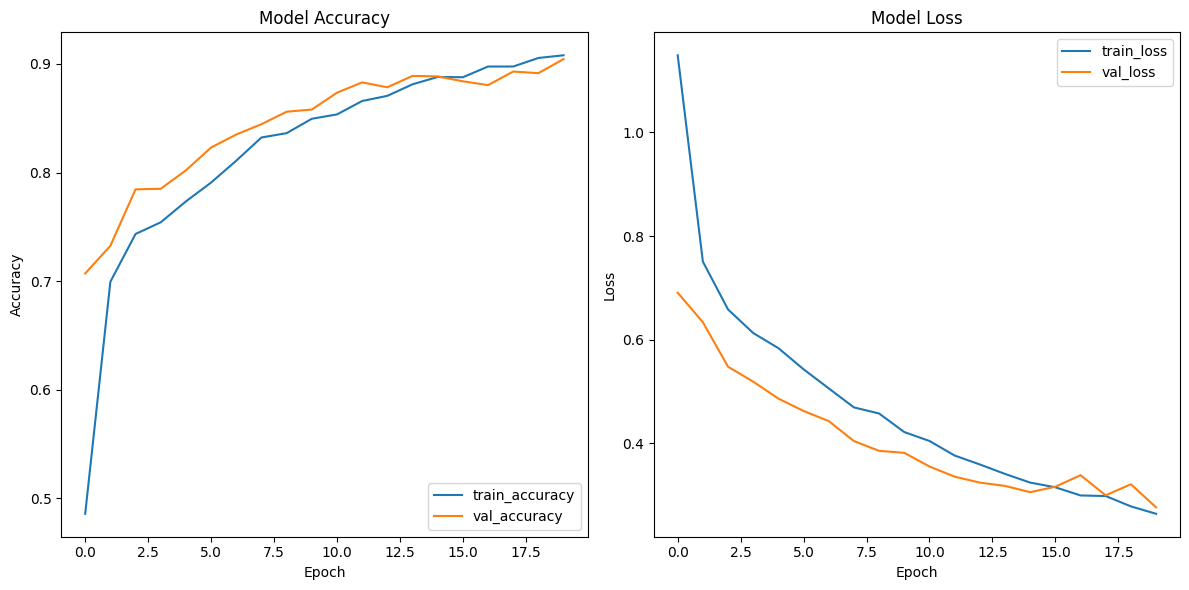

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


# Plotting the loss and accuracy graphs after training
def plot_training_history(history):
    # Accuracy Plot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Call the function after training the model
plot_training_history(history)

Both training and validation loss decrease consistently over the epochs, showing that the model is learning effectively and reducing error. The fact that the validation loss continues to decrease without a major gap between the two losses suggests that there isn't significant overfitting.
Slight fluctuation in validation loss towards the end is normal but might indicate that the model is reaching its optimal performance, and further training might not result in much improvement.